### Signature functions 

Structure functions are not exactly analogous to the distribution of kinetic energy as a function of scale. A very rough interpretation of them from Townsend suggested that they are similar to the cumulative energy upto a certain scale (summing from smaller to larger). This interpretation is only partially correct, since a contribution also comes from the larger scale enstrophy. 

Heurestically this translates as, the shallower the SF2 or KE spectrum, the more representative it is of the cumulative energy distribution. 

To improve on this, Davidson 2004 suggested a real space analogue for the spectrum. It is defined as: 

\begin{equation}
V(r) = -\frac{r^2}{2} \frac{\partial}{\partial r} \frac{1}{r} \frac{\partial}{\partial r} (\frac{3}{4} \left< \triangle v \right> ^2)
\end{equation} 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n = 100
nj = np.arange(1, 10*n+1)
wj = 1/n
r_j = (nj - 0.5)/n

r_j = np.logspace(-2, 2, 101)
k_i = np.logspace(-2, 2, 101)
k_i = 2*np.pi*k_i

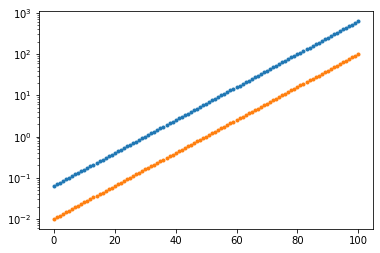

In [7]:
plt.plot(k_i,'.', label='k')
plt.plot(r_j,'.', label='r')
plt.yscale('log')
#plt.xscale('log')

In [8]:
import scipy.special as sp

dk = np.diff(k_i)
dk = np.append(dk[0], dk)

ni = len(k_i)
nj = len(r_j)

In [9]:
def bessel_kernel(k,r): 
    return (1. - sp.jv(0,k*r))

In [10]:
K = np.zeros((ni, nj))

# exact kernel
for i in range(ni):
    for j in range(nj):
        K[i,j] = 2*dk[i]*bessel_kernel(k_i[i], r_j[j])

        
# approximate kernel        
Kapprox = np.zeros((ni, nj))

Kapprox1 = np.zeros((ni, nj))
Kapprox2 = np.zeros((ni, nj))

for i in range(ni):
    for j in range(nj):
        
        if k_i[i]< 2/r_j[j]:
            Kapprox[i,j] = (k_i[i]**2) *(r_j[j]**2)/2 * dk[i]
            Kapprox1[i,j] = (k_i[i]**2) *(r_j[j]**2)/2 * dk[i]
            Kapprox2[i,j] = 0.
        else:
            Kapprox[i,j] = 2*dk[i]
            Kapprox1[i,j] = 0.
            Kapprox2[i,j] = 2*dk[i]        

In [13]:
# Generate ideal spectra
f_3 = 1*k_i/k_i
f_3[k_i>1] = 1e0*k_i[k_i>1]**-3

f_2 = 1*k_i/k_i
f_2[k_i>1] = 1e0*k_i[k_i>1]**-2

f_53 = 1*k_i/k_i
f_53[k_i>1] = 1e0*k_i[k_i>1]**-(5/3)

# normalize to have same total energy
f_3 = f_3/np.sum(f_3*dk)
f_2 = f_2/np.sum(f_2*dk)
f_53 = f_53/np.sum(f_53*dk)

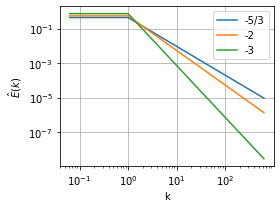

In [14]:
plt.figure(figsize=(4,3))
plt.plot(k_i, f_53, '-', label='-5/3')
plt.plot(k_i, f_2, '-', label = '-2')
plt.plot(k_i, f_3, '-', label='-3')

#plt.ylim([0.1, 10])
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.legend()

plt.xlabel('k')
plt.ylabel(r'$\hat{E} (k)$')

plt.tight_layout()
plt.savefig('ek_ideal.pdf')

In [15]:
# Calculate the corresponding structure functions 
g_3 = np.matmul(K.T, f_3)
g_2 = np.matmul(K.T, f_2)
g_53 = np.matmul(K.T, f_53)
#g_j

g_3approx = np.matmul(Kapprox.T, f_3)
g_2approx = np.matmul(Kapprox.T, f_2)
g_53approx = np.matmul(Kapprox.T, f_53)

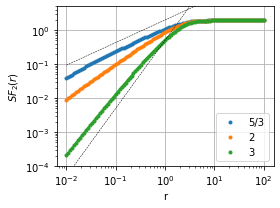

In [16]:
plt.figure(figsize=(4,3))

plt.plot(r_j, g_53, '.',label='5/3', color='tab:blue')
plt.plot(r_j, g_53approx, '-', color='tab:blue')

plt.plot(r_j, g_2, '.',label='2', color='tab:orange')
plt.plot(r_j, g_2approx, '-', color='tab:orange')

plt.plot(r_j, g_3, '.',label='3', color='tab:green')
plt.plot(r_j, g_3approx, '-', color='tab:green')


plt.plot(r_j, 0.5*r_j**2, '--', linewidth=0.5, color='k')

plt.plot(r_j, 2*r_j**(2/3), '--', linewidth=0.5, color='k')

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

plt.ylim([1e-4 , 5])


plt.legend()

plt.xlabel('r')
plt.ylabel(r'$SF_2 (r)$')

plt.tight_layout()
#plt.savefig('S2_ideal.pdf')

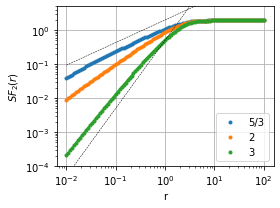

In [19]:
plt.figure(figsize=(4,3))

plt.plot(r_j, g_53, '.',label='5/3', color='tab:blue')
plt.plot(r_j, g_53approx, '-', color='tab:blue')

plt.plot(r_j, g_2, '.',label='2', color='tab:orange')
plt.plot(r_j, g_2approx, '-', color='tab:orange')

plt.plot(r_j, g_3, '.',label='3', color='tab:green')
plt.plot(r_j, g_3approx, '-', color='tab:green')


plt.plot(r_j, 0.5*r_j**2, '--', linewidth=0.5, color='k')

plt.plot(r_j, 2*r_j**(2/3), '--', linewidth=0.5, color='k')

plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

plt.ylim([1e-4 , 5])


plt.legend()

plt.xlabel('r')
plt.ylabel(r'$SF_2 (r)$')

plt.tight_layout()
#plt.savefig('S2_ideal.pdf')

In [20]:
from scipy.interpolate import CubicSpline


In [81]:
# Fit data using cubic spline

x = r_j
y= g_53

cs = CubicSpline(x,y)

In [82]:
Vsig = -x* cs(x,2) + cs(x,1)
Vsig_approx =  cs(x,1)

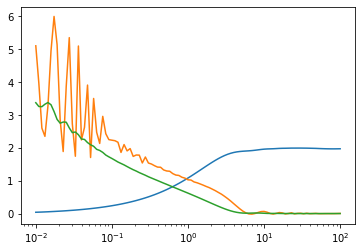

In [83]:
plt.plot(x, y)
plt.plot(x, Vsig)
plt.plot(x, cs(x,1 ))
#plt.plot(x, cs(x,2 ))

plt.xscale('log')
#plt.yscale('log')

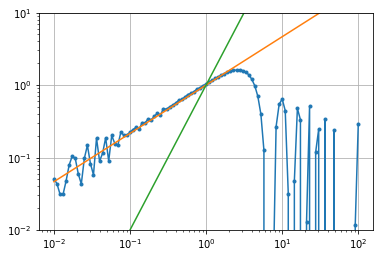

In [84]:
plt.plot(x, x*Vsig, '.-')
#plt.plot(x, x*Vsig_approx, '.-')

plt.plot(x, x**(2/3))
plt.plot(x, x**(2))
#plt.plot(x, cs(x,2 ))
plt.yscale('log')
plt.xscale('log')

plt.ylim([0.01, 10])
plt.grid()